<a href="https://colab.research.google.com/github/safa1231/Machine-learning-/blob/main/KNN_with_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [10]:
# Load dataset
from google.colab import files
uploaded=files.upload()
data = pd.read_csv('fake_bills.csv',sep=';')

# Display the first few rows
print(data.head())


Saving fake_bills.csv to fake_bills (2).csv
   is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0        True    171.81       104.86        104.95        4.52       2.89   
1        True    171.46       103.36        103.66        3.77       2.99   
2        True    172.69       104.48        103.50        4.40       2.94   
3        True    171.36       103.91        103.94        3.62       3.01   
4        True    171.73       104.28        103.46        4.04       3.48   

   length  
0  112.83  
1  113.09  
2  113.16  
3  113.51  
4  112.54  


EDA analysis

In [18]:
# Check for null values
print(data.isnull().sum())

# Visualize data distribution
print(data.columns)

#CLeaning missing data
data_cleaned = data.dropna()
print(data_cleaned.isnull().sum())


is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64
Index(['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
       'margin_up', 'length'],
      dtype='object')
is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64


**Splitting the dataset**

In [46]:
# Features and labels
X = data_cleaned.drop('is_genuine', axis=1)
y = data_cleaned['is_genuine']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Feature scaling**

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


**Training the model**

In [27]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # We will look for the best value of K later

# Fit the model
knn.fit(X_train, y_train)


KNeighborsClassifier()

**model performance evaluation**

In [28]:
# Predict on test data
y_pred = knn.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[146   2]
 [  0 291]]

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.99      0.99       148
        True       0.99      1.00      1.00       291

    accuracy                           1.00       439
   macro avg       1.00      0.99      0.99       439
weighted avg       1.00      1.00      1.00       439

Accuracy: 0.9954441913439636


*Interpretation:*<br>The model correctly classified 146 fake and 291 genuine bills.

It only made 2 mistakes, predicting "genuine"(original) for 2 actually fake bills.

It never misclassified a genuine bill as fake



**Best K**

Best k: 22 with error rate: 0.002277904328018223


<ipython-input-50-f1fd3ffa3083>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


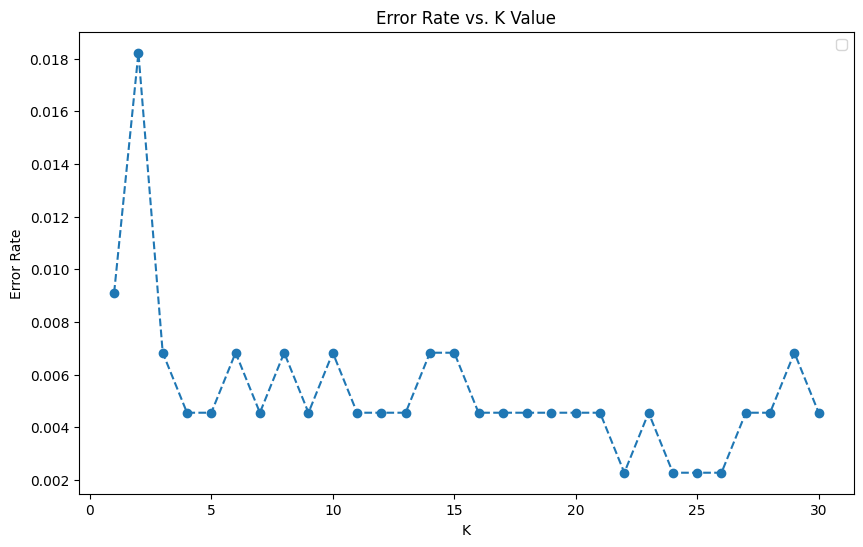

In [50]:
# Test different values for k
error_rates = []
for k in range(1, 200):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = np.mean(pred_k != y_test)
    error_rates.append(error)

# Find best k (minimum error)
best_k_index = np.argmin(error_rates)       # index of the minimum error
best_k = best_k_index + 1                   # because range(1, 200) starts at k=1
print(f"Best k: {best_k} with error rate: {error_rates[best_k_index]}")

# Plot error rate vs. k for first 30 values (you can adjust this)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), error_rates[:30], marker='o', linestyle='dashed')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()
plt.show()


**Predicting the Class of a new observation**

In [45]:
import pandas as pd
columns = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

# New bill data
new_bill = pd.DataFrame([[125.4, 62.3, 62.1, 10.2, 12.4, 139.7]], columns=columns)
# Scale the new observation
new_bill_scaled = scaler.transform(new_bill)

# Prediction
prediction = knn.predict(new_bill_scaled)

# Output
result = "Genuine" if prediction[0] == 1 else "Fake"
print(f"The new bill is predicted to be: {result}")





The new bill is predicted to be: Genuine
